In [1]:
import matplotlib.pyplot as plt
import numpy as np
import graphviz
# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
class TreeNode:
    def __init__(self, name, value=None, shape='rectangle'):
        self.name = name
        self.value = value
        self.children = []
        self.shape = shape

    def add_child(self, child_node):
        self.children.append(child_node)

    def display_tree_text(self, level=0):
        indent = "  " * level
        print(f"{indent}|- {self.name}: {self.value}")
        for child in self.children:
            child.display_tree_text(level + 1)

    def display_tree_graphviz(self, dot=None, parent_name=None, graph=None):
        if graph is None:
            graph = graphviz.Digraph(format='png')
        graph.node(str(id(self)), str(self.name), shape=self.shape)

        if parent_name is not None:
            graph.edge(str(id(parent_name)), str(id(self)))

        for child in self.children:
            child.display_tree_graphviz(dot, self, graph)

        return graph

    def display_tree_directly(self):
        graph = self.display_tree_graphviz()
        src = graph.source
        display(graphviz.Source(src, format='png'))

In [3]:
# Creating nodes
root = TreeNode("Root")
child1 = TreeNode("Child 1")
child2 = TreeNode("Child 2")
child3 = TreeNode("Child 3")

# Building the tree structure
root.add_child(child1)
root.add_child(child2)
child2.add_child(child3)

In [4]:
# Displaying the tree in text format
root.display_tree_text()

|- Root: None
  |- Child 1: None
  |- Child 2: None
    |- Child 3: None


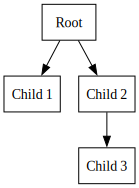

In [8]:
graph = root.display_tree_graphviz()
graph

In [9]:
class DecisionTreeNode:
    def __init__(self, feature, threshold, decision=None, left=None, right=None, shape='box'):
        self.feature = feature
        self.threshold = threshold
        self.decision = decision
        self.left = left
        self.right = right
        self.shape = shape

    def display_tree_graphviz(self, dot=None, parent_name=None, graph=None, edge_label=None):
        if graph is None:
            graph = graphviz.Digraph(format='png')

        node_label = self.feature
        
        if self.threshold is not None:
            node_label += f" <= {self.threshold}"
        
        if self.decision is not None:
            node_label += f"\nDecision: {self.decision}"
        
        graph.node(str(id(self)), node_label, shape=self.shape)

        if parent_name is not None:
            if edge_label is not None:
                graph.edge(str(id(parent_name)), str(id(self)), label=edge_label)
            else:
                graph.edge(str(id(parent_name)), str(id(self)))

        if self.left is not None:
            self.left.display_tree_graphviz(dot, self, graph, edge_label="True")
        if self.right is not None:
            self.right.display_tree_graphviz(dot, self, graph, edge_label="False")

        return graph

In [12]:
root = DecisionTreeNode("Feature A", 5.0, decision=None)
left_child = DecisionTreeNode("Feature B", 3.0, decision=None)
right_child = DecisionTreeNode("Feature C", 8.0, decision=None)
root.left = left_child
root.right = right_child

left_left = DecisionTreeNode("", None, decision = 20.0)
left_right = DecisionTreeNode("", None, decision = 10.0)

left_child.left = left_left
left_child.right = left_right

right_left = DecisionTreeNode("", None, decision = 30.0)
right_right = DecisionTreeNode("", None, decision = 40.0)

right_child.left = right_left
right_child.right = right_right

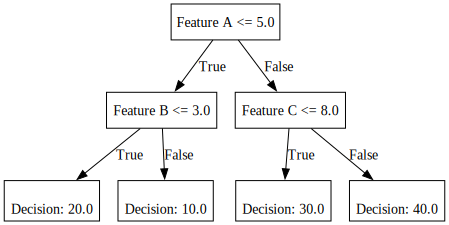

In [13]:
root.display_tree_graphviz()